# Introdução

<h3> ** O principal objetivo deste notebook é praticar o uso do python para análise de dados e uso de alguns modelos de classificação do scikit-learn. ** </h3>


- O dataset que vamos utilizar para o nosso estudo será o dataset "qualidade_do_ar.csv".
    O conjunto de dados contém 9358 resultados médios de 5 sensores químicos de um dispositivo multisensor (PTXX.SX). O dispositivo estava localizado a nível da rua, dentro de uma cidade significativamente poluída. Os dados foram registrados de março de 2004 a fevereiro de 2005 (um ano). Valores ausentes são marcados com o valor -200. A medida de outros sensores também está disponível e algumas podem ser redundantes. A variável chave a ser analisada é PT08.S1 (CO), concentração de CO na atmosfera.



<h4> Abaixo estão as descrições dos atributos do Dataset: </h4>
    
1.	Date (DD/MM/YYYY) 
2.	Time (HH.MM.SS) 
3.	PT08.S1 (CO) – Variável de predição
4.	Non Metanic HydroCarbons Concentration (mg/m^3)
5.	4 Benzene Concentration (mg/m^3) 
6.	PT08.S2 (NMHC) 
7.	NOx Concentration (ppb) 
8.	PT08.S3 (NOx) 
9.	8 NO2 Concentration (mg/m^3) 
10.	PT08.S4 (NO2s) 
11.	PT08.S5 (O3) 
12.	Temperature (C) 
13.	Relative Humidity (%) 
14.	AH Absolute Humidity 
    

# Iniciando a Importação e Análise Exploratória de Dados.

In [1]:
# Carregando as bibliotecas iniciais
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importando o DataSet e definindo o separador decimal para ',' e substiuíndo os valores "-200" por valores "N/A".
df_ar = pd.read_csv('qualidade_do_ar.csv', sep=';',decimal=',' ,  keep_default_na=False, na_values = -200 )

# Visualizando as dimensões do dataset original
df_ar.shape

(9357, 14)

In [3]:
# Olhando as 10 primeiras linhas do dataset
df_ar.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [4]:
# Olhando os tipos e formato dos dados antes das conversões
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
Date             9357 non-null object
Time             9357 non-null object
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(12), object(2)
memory usage: 1023.5+ KB


In [5]:
# Verificando os valores únicos
df_ar.nunique()

Date              391
Time               24
PT08.S1(CO)      1041
NMHC(GT)          429
C6H6(GT)          407
PT08.S2(NMHC)    1245
NOx(GT)           925
PT08.S3(NOx)     1221
NO2(GT)           283
PT08.S4(NO2)     1603
PT08.S5(O3)      1743
T                 436
RH                753
AH               6683
dtype: int64

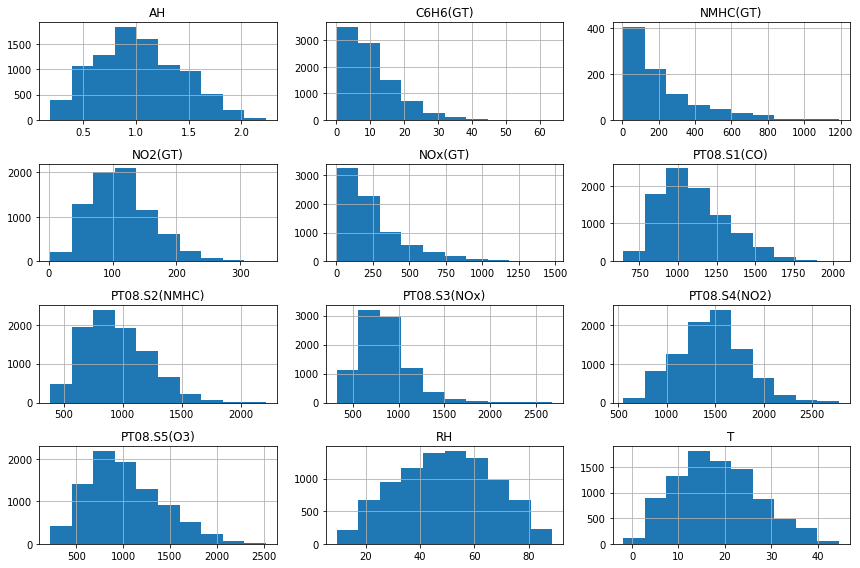

In [6]:
# Distribuição dos atributos do dataset
df_ar.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

## Verificando e Tratando os valores nulos e/ou N/A
- Nesta etapa vamos veriicar e tratar os valores nulos e/ou N/A.

In [7]:
# Verificando valores nulos.
print('Valores Nulos\n')
print(df_ar.isnull().sum())

# Verificando valores N/A.
print('\nValores N/A \n')
print(df_ar.isna().sum())

Valores Nulos

Date                0
Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Valores N/A 

Date                0
Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [8]:
# Exibindo o percentual de valores N/A por atributo
total = df_ar.isnull().sum().sort_values(ascending=False)
percentual = (df_ar.isna().sum()/df_ar.isna().count() *100).sort_values(ascending=False)
df_valores_na = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])

print('\nPercentual de valores N/A por Atributo')
df_valores_na.head(20)



Percentual de valores N/A por Atributo


,Total,Percentual
NMHC(GT),8443,90.231912
NO2(GT),1642,17.548360
NOx(GT),1639,17.516298
AH,366,3.911510
RH,366,3.911510
T,366,3.911510
PT08.S5(O3),366,3.911510
PT08.S4(NO2),366,3.911510
PT08.S3(NOx),366,3.911510
PT08.S2(NMHC),366,3.911510


## Adicionar e Tratar colunas no dataframe
- Vamos adicionar e tratar algumas colunas para nos ajudar na análise

In [9]:
# Converte a coluna Date para o tipo datetime.
df_ar['Date'] = pd.to_datetime(df_ar['Date'],  dayfirst=True)

In [10]:
# Retira o '.' da coluna Time.
df_ar['Time'] = df_ar.Time.apply(lambda x: x.split('.')[0])

In [11]:
# Cria um lista com os dias da semana
dia_semana = ['1-Domingo', '2-Segunda-feira', '3-Terça-feira', '4-Quarta-feira', '5-Quinta-Feira','6-Sexta-feira','7-Sábado']

In [12]:
# Cria a função para obter a estação do ano
#Função obtida em Brainly.com.br - https://brainly.com.br/tarefa/10942888#readmore
def estacao_ano(dia, mes):
    if mes in (1, 2):
        return 'Verão'
    elif mes == 3:
        if dia < 21:
            return 'Verão'
        else:
            return 'Outono'
    elif mes in (4, 5):
        return 'Outono'
    elif mes == 6:
        if dia < 21:
            return 'Outono'
        else:
            return 'Inverno'
    elif mes in (7, 8):
        return 'Inverno'
    elif mes == 9:
        if dia < 21:
            return 'Inverno'
        else:
            return 'Primavera'
    elif mes in (10, 11):
        return 'Primavera'
    elif mes == 12:
        if dia < 21:
            return 'Primavera'
        else:
            return 'Verão'

In [13]:
# Adiciona o dia da semana no dataframe
df_ar['WeekDayName'] = df_ar.Date.apply(lambda x: dia_semana[int(x.strftime('%w'))])

In [14]:
# Adiciona a estação do ano no dataframe
df_ar['Season'] = df_ar.Date.apply(lambda x: estacao_ano(int(x.strftime('%d')), int(x.strftime('%m'))))

In [15]:
# Adiciona o ano, o mês e o dia no dataframe
df_ar['Year'] = df_ar.Date.dt.strftime('%y')
df_ar['Month'] = df_ar.Date.dt.strftime('%m')
df_ar['Day'] = df_ar.Date.dt.strftime('%d')

In [16]:
#df_tratado[(df_tratado['Date'] > '2004-6-18') & (df_tratado['Date'] <= '2004-7-21')]

In [17]:
# Altera a posição da coluna criada.
df_ar = df_ar[['Date', 'Season' , 'Year','Month','Day','WeekDayName','Time','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']]

## Tratar Valores Nulos e N/A
- Neste estudo vamos utilizar estratégias mais simples para o tratamento dos valores N/A, porém é importante saber que existem algumas técnicas mais avançadas, tais como: analisar correlações, criação de  um modelo preditivo para preenchimento dos valores N/A entre outras.



In [18]:
# O atributo 'NMHC_GT' está com mais de 90% dos registros com valores N/A que praticamente impossibilita de preenchermos os valores N/A.
# Vamos remover ele do nosso dataframe
df_ar.drop('NMHC(GT)',axis=1,inplace=True)   

In [19]:
# Como o atributo "PT08.S1(CO)" será a variável que vamos tanter prever, para esse caso não vamos preencher os valores N/A. 
# Vamos remover as linhas em que ele aparece como N/A.
df_ar.dropna(subset=['PT08.S1(CO)'], inplace=True);
df_ar.shape

(8991, 18)

In [20]:
# Vamos criar um funçõa pra ajudar no preenchimento dos N/A no dataframe
def preenche_vazios(dataframe, colunas_preencher, colunas_groupby):
    for coluna in colunas_preencher:
        dataframe[coluna] = dataframe[coluna].fillna(dataframe.groupby(colunas_groupby)[coluna].transform('mean'))

In [21]:
# Vamos preencher os valores faltantes com a média dos valores no mesmo mês e hora.
colunas_preencher = ['NOx(GT)','NO2(GT)']
colunas_groupby = ['Month','Time']
preenche_vazios(df_ar, colunas_preencher, colunas_groupby)

In [22]:
# Verificando valores N/A após o prenchimento com a média dos valores no mesmo mês e hora.
print('\nValores N/A \n')
print(df_ar.isna().sum())


Valores N/A 

Date               0
Season             0
Year               0
Month              0
Day                0
WeekDayName        0
Time               0
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          261
PT08.S3(NOx)       0
NO2(GT)          261
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64


In [23]:
# Ainda temos alguns valores faltante. Vamos preencher a média dos valores da hora.
colunas_groupby = ['Time']
preenche_vazios(df_ar, colunas_preencher, colunas_groupby)

In [24]:
# Verificando valores N/A após o prenchimento com a média dos valores da hora.
print('\nValores N/A \n')
print(df_ar.isna().sum())


Valores N/A 

Date             0
Season           0
Year             0
Month            0
Day              0
WeekDayName      0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [25]:
# Cria um dataset de valores N/A tratado.
df_na_tratado =  pd.DataFrame(df_ar, copy=True)

## Verificando e Tratando Outliers
- Nesta etapa vamos verificar a tratar os outliers

In [26]:
# Observando algumas medidas estatísticas das variáveis numéricas
# Podemos observar que alguns atributos estão com o desvio padrão (std) bem alto o que pode indicar a presença de outliers.
df_na_tratado.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.000000,1063.0000,1231.0000,2040.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.400000,8.2000,14.0000,63.700
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.500000,909.0000,1116.0000,2214.000
NOx(GT),8991.0,235.628247,196.900245,2.0000,100.307692,170.0000,319.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.000000,806.0000,969.5000,2683.000
NO2(GT),8991.0,108.192116,45.495667,2.0000,73.554244,104.0000,134.0000,333.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.000000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.500000,963.0000,1273.5000,2523.000
T,8991.0,18.317829,8.832116,-1.9000,11.800000,17.8000,24.4000,44.600
RH,8991.0,49.234201,17.316892,9.2000,35.800000,49.6000,62.5000,88.700


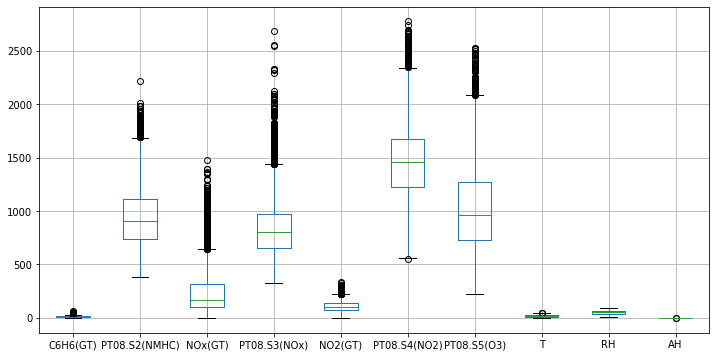

In [27]:
# Vamos plotar os dados dos atributos previsores para verificarmos os dados e indenticar outliers
df_na_tratado.boxplot(figsize=(12,6),column=['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']);

In [28]:
df_na_tratado.to_csv('df_na_tratado.csv', sep=';', decimal=',')

In [29]:
# Verificando outliers com a função Z-Score
#"O escore Z é o número sinalizado de desvios padrão pelo qual o valor de uma observação ou ponto de dados está acima do valor médio do que está sendo observado ou medido."
from scipy import stats

# Mínino de desvio padrão aceito para ser não ser considerado outlier.
threshold = 3
  
def fill_na_outliers(df, coluna, threshold):
    df[coluna] = np.where(np.abs(stats.zscore(df[coluna].values)) > threshold, np.nan, df[coluna])    

In [30]:
# Tratando os outliers de cada dos atibutos previsores.
for col in df_na_tratado.columns[8:]: 
    fill_na_outliers(df_na_tratado, col, threshold)

In [31]:
# Verificando a quantidade de valores indetificados como outliers que foram substituídos por N/A
df_na_tratado.isna().sum()

Date               0
Season             0
Year               0
Month              0
Day                0
WeekDayName        0
Time               0
PT08.S1(CO)        0
C6H6(GT)         118
PT08.S2(NMHC)     37
NOx(GT)          165
PT08.S3(NOx)     109
NO2(GT)           62
PT08.S4(NO2)      38
PT08.S5(O3)       37
T                  0
RH                 0
AH                 0
dtype: int64

In [32]:
# Cria o dataframe com tratameno dos outliers.
# Para esse caso onde os valores indetificados como outliers que foram substituídos por N/A, vamos remover do dataset as linhas com valores N/A.
df_tratado = pd.DataFrame(df_na_tratado.dropna(), copy=True)
df_tratado.shape

(8591, 18)

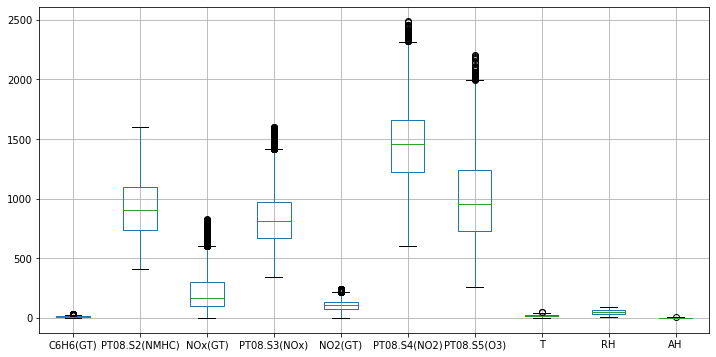

In [33]:
# Vamos plotar os dados dos atributos previsores após o tratamento os outliers
df_tratado.boxplot(figsize=(12,6), column=['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']);

## Realizando algumas análises
- Nesta Etapa vamos fazer algumas análises por dia, hora e etc...

#### Análise de ocorrência dos Anos, Meses e Dias

In [34]:
# Quantidade de Mês em cada Ano do dataset
print('\nQuantidade de Meses em cada ano\n')
df_tratado.groupby('Year').Month.nunique()


Quantidade de Meses em cada ano



Year
04    10
05     4
Name: Month, dtype: int64

In [35]:
# Meses em cada ano
print('\nMês em cada ano\n')
df_tratado.groupby('Year', as_index = False).agg({'Month': 'unique'}).sort_values(by='Year', ascending=True)



Mês em cada ano



,Year,Month
0,04,"[03, 04, 05, 06, 07, 08, 09, 10, 11, 12]"
1,05,"[01, 02, 03, 04]"


In [36]:
# Exibe a lista de dias de cada Mês que possui dadaos.
pd.set_option( 'display.max_colwidth', 1000)
print('\nDia em cada mês/ano\n')
df_tratado.groupby(['Year','Month']).agg({'Day': 'unique'}).sort_values(by='Year', ascending=True)


Dia em cada mês/ano



Day
Year Month                                                                                                                              
04   03                                         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
     04         [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
     05     [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
     06             [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
     07     [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
     08         [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31]
     09         [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
     10     [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
     11         [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
     12             [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
05   01             [01, 02, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
     02                         [01, 02, 03, 04, 05, 06, 07, 08, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
     03     [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
     04                                                                                                                 [01, 02, 03, 04]

In [37]:
# Quantidade de registros para cada mês
print('\nQuantidade de registros por mês/ano\n')
df_tratado.groupby(['Year','Month']).Month.count()


Quantidade de registros por mês/ano



Year  Month
04    03       484
      04       672
      05       717
      06       672
      07       739
      08       695
      09       685
      10       715
      11       612
      12       605
05    01       638
      02       543
      03       727
      04        87
Name: Month, dtype: int64

### Análises por Estação do Ano

In [38]:
# Visualiza a concentração total de CO por estação do ano, em ordem descrescente.
df_estacao = df_tratado.groupby('Season', as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
print('\nConcentração total de CO por Estação do ano\n')
df_estacao


Concentração total de CO por Estação do ano



,Season,PT08.S1(CO)
1,Outono,2668615.0
3,Verão,2366808.0
0,Inverno,2186459.0
2,Primavera,2123548.0


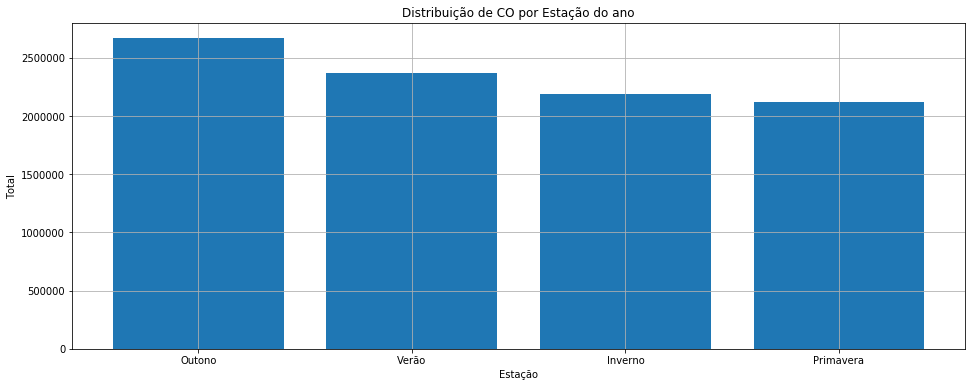

In [39]:
#Plota um gráfico com a Distribuição de CO por Estação do ano
fig, ax = plt.subplots(figsize=(16,6))
bar = ax.bar(df_estacao.Season, df_estacao['PT08.S1(CO)'].sort_values(ascending=False))
plt.title('Distribuição de CO por Estação do ano')
plt.xlabel('Estação')
plt.ylabel('Total')
plt.grid(True)
plt.show()

#### OBS: Vale a pena destacar que a presença de estações do ano no dataset podem indicar uma sazonalidade nos dados. 
#### Para evitar problemas no modelo, o ideal seria remover a sazonalidade a fim de obter uma série estacionária. Porém não vamos fazer isso nesse estudo.


### Análises por Mês

In [40]:
# Visualiza a concentração total de CO por estação do ano, em ordem descrescente.
df_mes = df_tratado.groupby('Month', as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
print('\nConcentração total de CO por Mês\n')
df_mes


Concentração total de CO por Mês



,Month,PT08.S1(CO)
2,03,1422699.0
3,04,863815.0
9,10,831874.0
6,07,771446.0
4,05,769202.0
8,09,733909.0
0,01,696013.0
5,06,684669.0
7,08,681837.0
10,11,664166.0


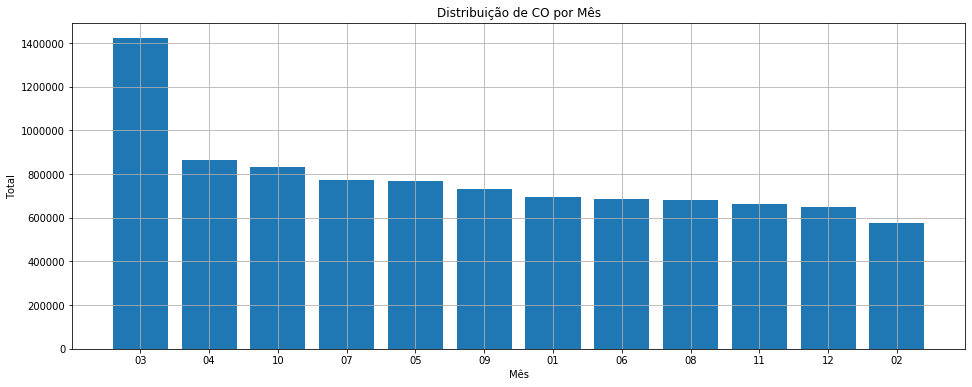

In [41]:
#Plota um gráfico com a Distribuição de CO por Mês
fig, ax = plt.subplots(figsize=(16,6))
bar = ax.bar(df_mes.Month, df_mes['PT08.S1(CO)'].sort_values(ascending=False))
plt.title('Distribuição de CO por Mês')
plt.xlabel('Mês')
plt.ylabel('Total')
plt.grid(True)
plt.show()

### Análises por hora

In [42]:
# Visualiza a concentração de CO total por hora, em ordem descrescente.
# TOP 5.
df_co_hora = df_tratado.groupby('Time', as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
print('\nConcentração total de CO por hora - TOP 5\n')
df_co_hora.head(5)


Concentração total de CO por hora - TOP 5



,Time,PT08.S1(CO)
20,20,422342.0
7,07,415358.0
9,09,412510.0
10,10,411337.0
13,13,410924.0


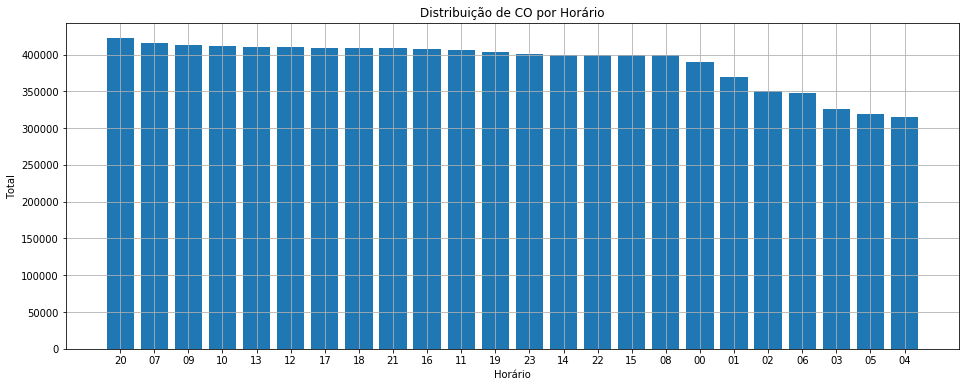

In [43]:
#Plota um gráfico com a Distribuição de CO por Horário
fig, ax = plt.subplots(figsize=(16,6))
bar = ax.bar(df_co_hora.Time, df_co_hora['PT08.S1(CO)'].sort_values(ascending=False))
plt.title('Distribuição de CO por Horário')
plt.xlabel('Horário')
plt.ylabel('Total')
plt.grid(True)
plt.show()

### Análises por Semana

In [44]:
# Visualiza a concentração total de CO por dia da semana, em ordem descrescente.
df_co_dia_semana = df_tratado.groupby('WeekDayName', as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
print('\nConcentração total de CO por dia da semana - TOP 5\n')
df_co_dia_semana


Concentração total de CO por dia da semana - TOP 5



,WeekDayName,PT08.S1(CO)
6,7-Sábado,1424510.0
4,5-Quinta-Feira,1343766.0
5,6-Sexta-feira,1340019.0
0,1-Domingo,1322767.0
2,3-Terça-feira,1313135.0
3,4-Quarta-feira,1306800.0
1,2-Segunda-feira,1294433.0


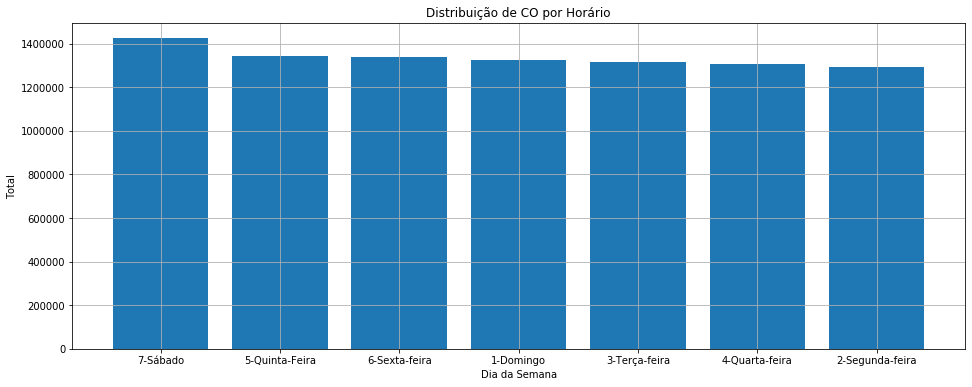

In [45]:
#Plota um gráfico com a Distribuição de CO por Dia da Semana
fig, ax = plt.subplots(figsize=(16,6))
bar = ax.bar(df_co_dia_semana.WeekDayName, df_co_dia_semana['PT08.S1(CO)'].sort_values(ascending=False))
plt.title('Distribuição de CO por Horário')
plt.xlabel('Dia da Semana')
plt.ylabel('Total')
plt.grid(True)
plt.show()

In [46]:
# Visualiza a concentração total de CO por dia da semana e hora, em ordem descrescente.
# TOP 5.
df_dia_semana_hora = df_tratado.groupby(['WeekDayName', 'Time'], as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
print('\nConcentração total de CO por dia da semana e hora - TOP 5\n')
df_dia_semana_hora.head(5)


Concentração total de CO por dia da semana e hora - TOP 5



,WeekDayName,Time,PT08.S1(CO)
163,7-Sábado,19,64912.0
154,7-Sábado,10,64520.0
32,2-Segunda-feira,08,64449.0
55,3-Terça-feira,07,64295.0
20,1-Domingo,20,63425.0


In [47]:
# Visualiza a concentração total de CO por por hora nas Quartas-feiras, em ordem descrescente.
# TOP 5.
df_dia_semana_hora = df_tratado[df_tratado.WeekDayName == '4-Quarta-feira'].groupby(['WeekDayName', 'Time'], as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
print('\nConcentração total de CO por hora nas Quartas-feiras - TOP 5\n')
df_dia_semana_hora.head(5)


Concentração total de CO por hora nas Quartas-feiras - TOP 5



,WeekDayName,Time,PT08.S1(CO)
20,4-Quarta-feira,20,62769.0
21,4-Quarta-feira,21,59929.0
18,4-Quarta-feira,18,59899.0
7,4-Quarta-feira,07,59525.0
11,4-Quarta-feira,11,59260.0


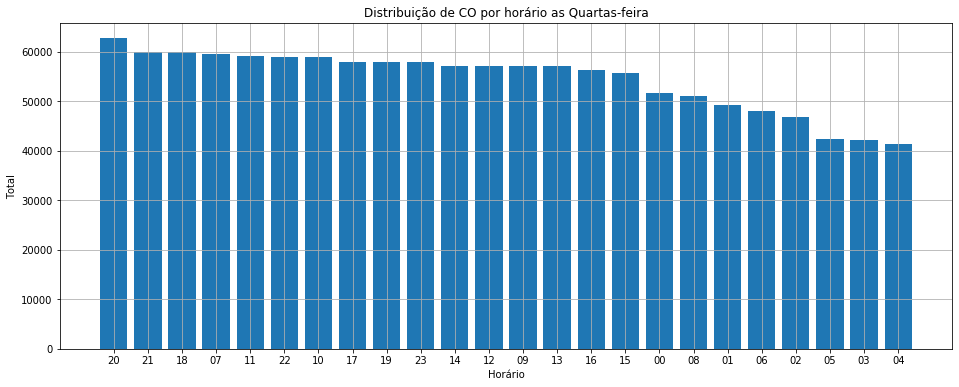

In [48]:
#Plota um gráfico com a Distribuição de CO por horário as Quartas-feira
fig, ax = plt.subplots(figsize=(16,6))
bar = ax.bar(df_dia_semana_hora.Time, df_dia_semana_hora['PT08.S1(CO)'].sort_values(ascending=False))
plt.title('Distribuição de CO por horário as Quartas-feira')
plt.xlabel('Horário')
plt.ylabel('Total')
plt.grid(True)
plt.show()

# Verificando a correlação dos Dados
- Nessa etapa vamos verificar quais atributos estão mais relacionados com o atributo target.
- A correlação indica a interdependência entre duas ou mais variáveis. Essa uma informação importante que pode ser aplicada em diversas situações.

In [49]:
# Verificando a correlação dos atributos pelo método de pearson.
df_tratado.corr(method='pearson')

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.869007,0.874624,0.638377,-0.788184,0.594701,0.651994,0.882492,0.071194,0.088376,0.139999
C6H6(GT),0.869007,1.000000,0.986517,0.635851,-0.769970,0.572335,0.756456,0.850324,0.254979,-0.116769,0.183795
PT08.S2(NMHC),0.874624,0.986517,1.000000,0.633842,-0.814591,0.598715,0.761278,0.860476,0.284575,-0.138266,0.195518
NOx(GT),0.638377,0.635851,0.633842,1.000000,-0.671011,0.733813,0.146696,0.715450,-0.237645,0.155126,-0.155386
PT08.S3(NOx),-0.788184,-0.769970,-0.814591,-0.671011,1.000000,-0.619412,-0.514519,-0.816255,-0.149170,-0.050392,-0.235073
NO2(GT),0.594701,0.572335,0.598715,0.733813,-0.619412,1.000000,0.103995,0.643496,-0.148173,-0.173879,-0.356507
PT08.S4(NO2),0.651994,0.756456,0.761278,0.146696,-0.514519,0.103995,1.000000,0.557407,0.594232,-0.057603,0.647724
PT08.S5(O3),0.882492,0.850324,0.860476,0.715450,-0.816255,0.643496,0.557407,1.000000,-0.010601,0.107019,0.077383
T,0.071194,0.254979,0.284575,-0.237645,-0.149170,-0.148173,0.594232,-0.010601,1.000000,-0.582880,0.650032
RH,0.088376,-0.116769,-0.138266,0.155126,-0.050392,-0.173879,-0.057603,0.107019,-0.582880,1.000000,0.171303


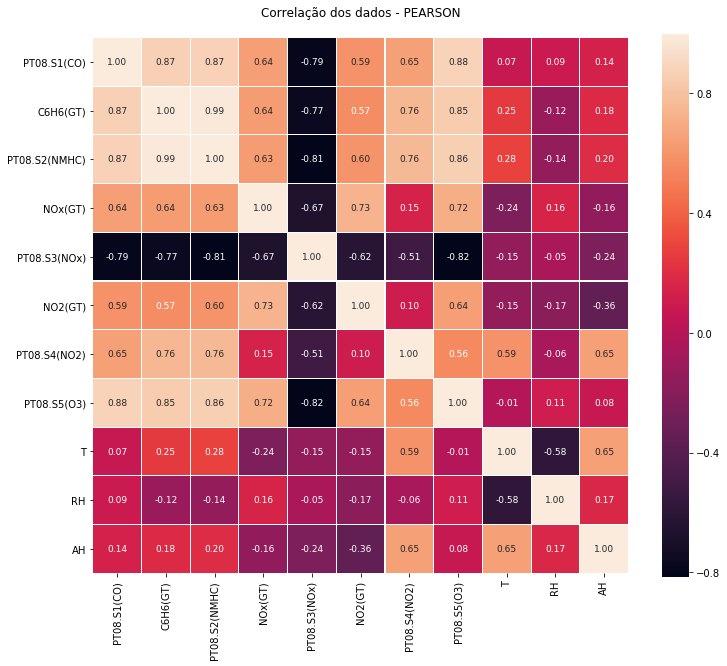

In [50]:
# Plota o gráfico de correlação dos dados pelo método de pearson.
# Qual mais próximo de 1 ou -1 mais correlacionado o atributo está com atributo target.
# OBS: É importante destacar que a Correlação não implica causa.
plt.figure(figsize=(12,10))
ax1 = sns.heatmap(df_tratado.corr(method='pearson'),linewidths=0.1,vmax=1.0, square=True, annot=True, fmt='.2f', annot_kws={"size": 9})
plt.title('Correlação dos dados - PEARSON\n')
plt.show()

### Interpretando a análise de Correlação

##### Legenda dos coeficientes: 
- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.


##### Observando os resultados da análise da correlação realizada anteriomente (pearson) e com base na legenda acima, podemos destacar o seguinte: 

##### Temos 04 atributos com correlação FORTE ao atributo target (PT08.S1(CO) ). São eles: 
    - C6H6(GT)      
    - PT08.S2(NMHC) 
    - PT08.S3(NOx)  
    - PT08.S5(O3)   
    
##### Temos 03 atributos correlação MODERADA ao atributo target (PT08.S1(CO) ). São eles: 
    - NOx(GT)      
    - NO2(GT)      
    - PT08.S4(NO2) 



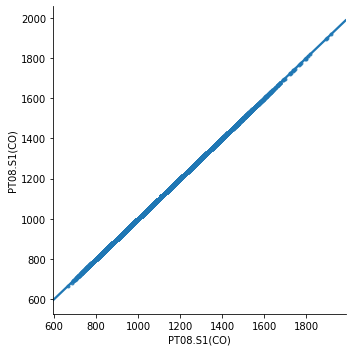

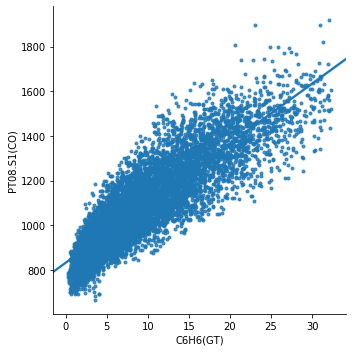

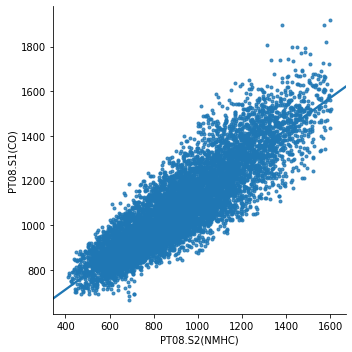

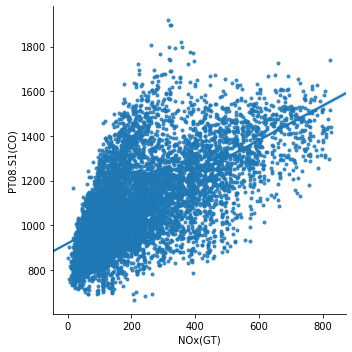

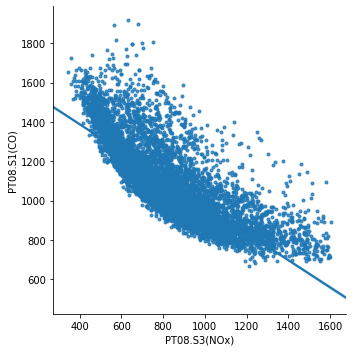

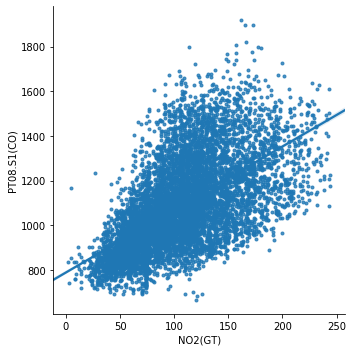

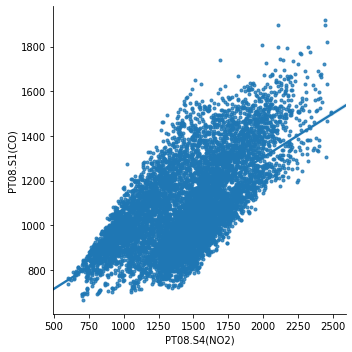

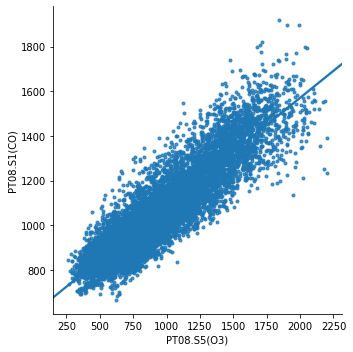

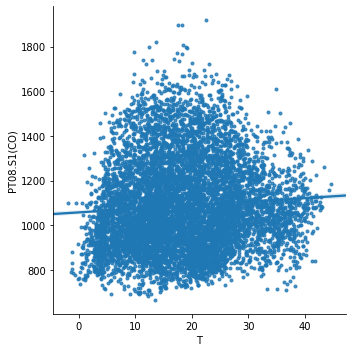

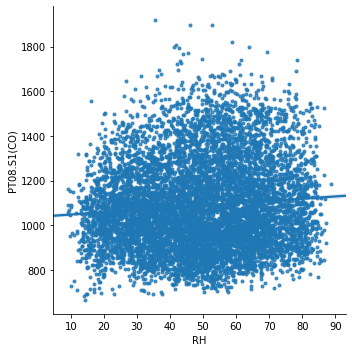

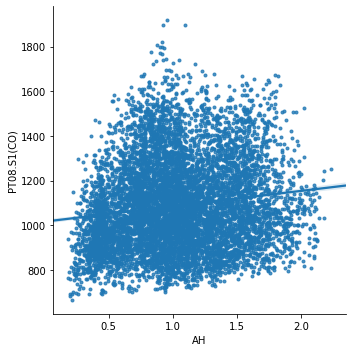

In [51]:
# Vamos tentar identificar visualmente  se é possível saber qual é o grau de linearidade entre o atributo target e os atributos previsores.
# Para isso vamos plotar os atributos previsores em relação ao atributo target.
for coluna in df_tratado.columns.tolist()[7:]:
    sns.lmplot(x=coluna,y='PT08.S1(CO)',data=df_tratado,markers='.')    

# Preparando os dados para criação do Modelo de Previsão

In [52]:
# Dividindo os atributos do dataframe 

# OBS: É importante lembrar que existem algumas técnicas para realizar a seleção dos atributos mais relevantes para o modelo de previsão, tais como: Filtros (Filterning), Empacotamento (Wrapping) e Embarcados (Embedded). 
# Contudo neste estudo vamos utilizar todos os atributos previsores no nosso modelo.

# Previsores
#atributos_previsores = ['C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S5(O3)',  'NOx(GT)', 'NO2(GT)',  'PT08.S4(NO2)']
atributos_previsores = ['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

x = df_tratado[atributos_previsores]

# Target
y = df_tratado[['PT08.S1(CO)']]

In [53]:
print('Shape dos dados de X e y')
print(x.shape)
print(y.shape)

Shape dos dados de X e y
(8591, 10)
(8591, 1)


In [54]:
# Realiza a Padronização dos previsores
from sklearn.preprocessing import StandardScaler

# Padroniza os dados de x
scale_x = StandardScaler()
x_p= scale_x.fit_transform(x)

In [55]:
# Realiza a Padronização do target
from sklearn.preprocessing import StandardScaler

#Padroniza os dados de y
scale_y = StandardScaler()
y_p= scale_y.fit_transform(y)

# Testando Alguns Modelos de Machine Learning

In [56]:
# Importando as bibliotecas dos modelos

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures


In [57]:
# Cria a lista de modelos para avaliação.

modelos = []

modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('Ridge', Ridge(alpha=0.5)))
modelos.append(('Lasso', Lasso(alpha=0.5)))
modelos.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
modelos.append(('AdaBoostRegressor', AdaBoostRegressor()))
modelos.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
modelos.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=10)))
modelos.append(('ExtraTreesRegressor', ExtraTreesRegressor(n_estimators=10)))
modelos.append(('BaggingRegressor', BaggingRegressor()))
modelos.append(('SVR', SVR(gamma='auto')))


In [58]:
from datetime import datetime

# Defindo os parâmetos do FOLD
qtd_instancias = len(x)
qtd_folds = 10
seed = 1

# Definindo as listas para análise dos resultados.
resultados = []
nomes_modelos = []
tempo_treinamento_modelos = []


# Treina os Modelos
for nome_modelo, modelo in modelos:
    
    kfold = model_selection.KFold(n_splits=qtd_folds, random_state=seed)
        
    #Define o tempo de inicio do Treinamento
    inicio = datetime.now()

    resultados_cros_val = model_selection.cross_val_score(modelo, x_p, y_p.ravel(), cv=kfold, scoring='neg_mean_absolute_error'  ) 
    
    #Define o tempo final do Treinamento
    fim = datetime.now()   
    tempo_modelo = (fim - inicio).total_seconds()
    tempo_treinamento_modelos.append(tempo_modelo)
    
    resultados.append(resultados_cros_val)   
    nomes_modelos.append(nome_modelo)    
    

    # Exibindo a performance dos modelos
    print('\nModelo: %s ' %  nome_modelo)
    print("MAE: %.6f (Std: %.6f)"  % (resultados_cros_val.mean(), resultados_cros_val.std()))
    print('Tempo de Treinamento: %s segundos' % tempo_modelo )  
    
    #print(resultados_cros_val)
    
    # MAE = MEAN ABSOLUTE ERROR
    # OBS: No cross_val_score o resultado do MAE é invertido.


Modelo: LinearRegression 
MAE: -0.348815 (Std: 0.162272)
Tempo de Treinamento: 0.021143 segundos

Modelo: Ridge 
MAE: -0.348766 (Std: 0.162153)
Tempo de Treinamento: 0.016061 segundos

Modelo: Lasso 
MAE: -0.542460 (Std: 0.100388)
Tempo de Treinamento: 0.037383 segundos

Modelo: DecisionTreeRegressor 
MAE: -0.391045 (Std: 0.150088)
Tempo de Treinamento: 0.698828 segundos

Modelo: AdaBoostRegressor 
MAE: -0.384245 (Std: 0.143247)
Tempo de Treinamento: 5.230372 segundos

Modelo: GradientBoostingRegressor 
MAE: -0.307611 (Std: 0.148194)
Tempo de Treinamento: 3.60868 segundos

Modelo: RandomForestRegressor 
MAE: -0.307544 (Std: 0.152341)
Tempo de Treinamento: 4.006965 segundos

Modelo: ExtraTreesRegressor 
MAE: -0.311645 (Std: 0.155481)
Tempo de Treinamento: 1.564694 segundos

Modelo: BaggingRegressor 
MAE: -0.312796 (Std: 0.151716)
Tempo de Treinamento: 3.900469 segundos

Modelo: SVR 
MAE: -0.279518 (Std: 0.124410)
Tempo de Treinamento: 16.42889 segundos


### Comparando os resultados.
- Nesta etapa vamos comparar os resultados dos algoritmos e escolher o que melhor se adaptou aos dados.

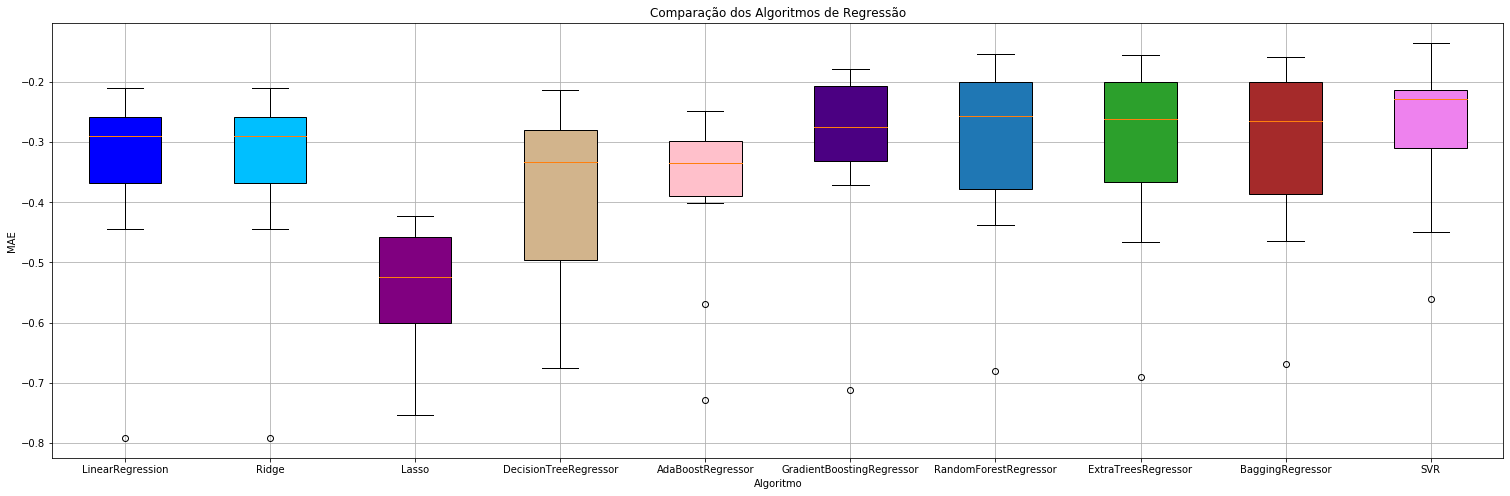

In [59]:
#Plota um gráfico de Comparação dos Tempo de treinamentodos Algoritmos de Regressão
colors = ['blue', 'deepskyblue', 'purple', 'tan', 'pink', 'indigo', 'tab:blue', 'tab:green', 'brown', 'violet', 'grey']

fig, ax = plt.subplots(figsize=(26,8))
box = ax.boxplot(resultados, vert=True, patch_artist=True,labels=nomes_modelos)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparação dos Algoritmos de Regressão')
plt.xlabel('Algoritmo')
plt.ylabel('MAE')

plt.grid(True)
plt.show()

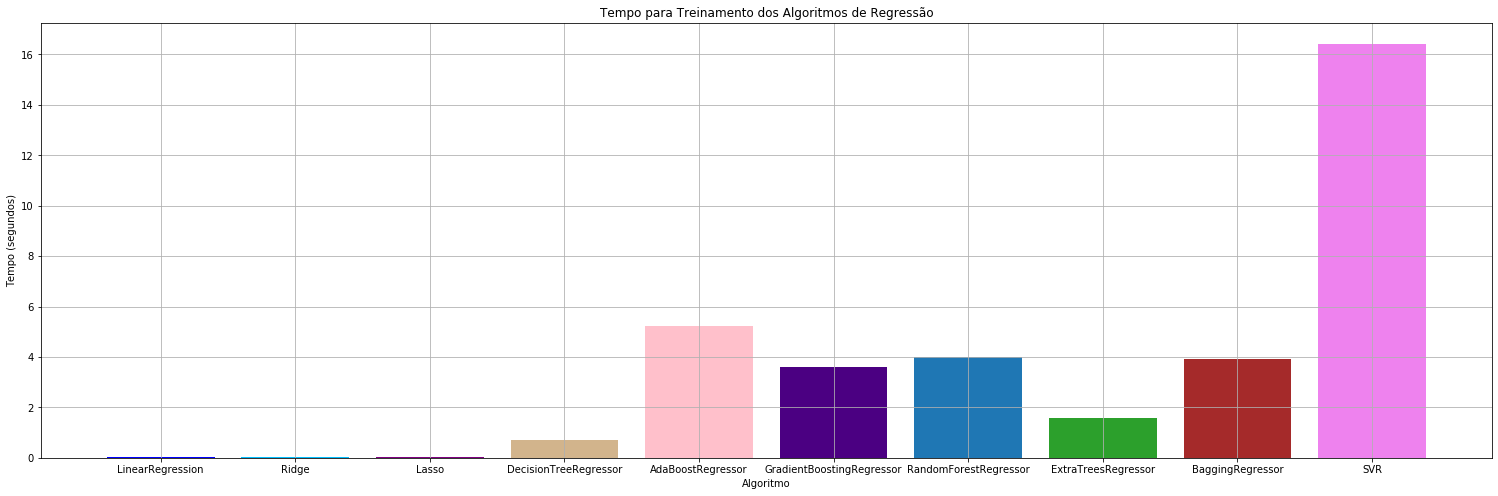

In [60]:
#Plota um gráfico de Comparação do tempo de treinamento dos Algoritmos de Regressão
fig, ax = plt.subplots(figsize=(26,8))
bar = ax.bar(nomes_modelos, tempo_treinamento_modelos, color=colors)
ax.set_xticklabels(nomes_modelos)
plt.title('Tempo para Treinamento dos Algoritmos de Regressão')
plt.xlabel('Algoritmo')
plt.ylabel('Tempo (segundos)')

plt.grid(True)
plt.show()

# Escolhendo um Modelo de Previsão
- Nos resultados apresentados pela validação cruzadas dos algoritmos o algoritmo que apresentou o menor erro (considerando MAE - Mean Absolut Error) foi o SVR. Por isso, escolhemos ele.
- Porém é importante fazer uma ressalva: Nestes testes utilizamos as configurações padrões dos algoritmos, o que algumas vezes pode interferir no desempenho. Para realmente determinar o melhor, seria necessário alterar os hype-parâmetros de cada um deles executar várias combinações diferentes.


In [61]:
# O algoritmo de regressão que obteve o melhor resultado para este conjunto de dados, apesar do maior tempo para treinamento, foi o SVR. Vamos escolher ele para criar o nosso modelo final.
# Criando o Modelo
modelo = SVR(gamma='auto')
#modelo = RandomForestRegressor(n_estimators=15)

In [62]:
# Separando os dados de Treinamento e Teste
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_p, y_p, test_size = 0.3)

In [63]:
print('Shape dos dados de Treinamento')
print(x_treinamento.shape)
print(y_treinamento.shape)

Shape dos dados de Treinamento
(6013, 10)
(6013, 1)


In [64]:
print('Shape dos dados de Teste')
print(x_teste.shape)
print(y_teste.shape)


Shape dos dados de Teste
(2578, 10)
(2578, 1)


In [65]:
# Treinando o modelo selecionado
modelo.fit(x_treinamento, y_treinamento.ravel());

In [66]:
# Realiza a previsão com os dados de Teste
y_previsto = modelo.predict(x_teste)

In [67]:
# Analisando a performance do modelo final

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_teste, y_previsto)
rmse = mean_squared_error(y_teste, y_previsto)

print('\nMean Absolute Error do modelo final: %.2f%%' % (mae*100))
print('\nMean Squared Error do modelo final: %.2f%% \n ' % (rmse*100))


Mean Absolute Error do modelo final: 19.10%

Mean Squared Error do modelo final: 7.14% 
 


# Exibindo os dados de Teste após a Previsão

In [68]:
print("\nEstatísticas do atributo target:\n")
df_tratado['PT08.S1(CO)'].describe()


Estatísticas do atributo target:



count    8591.000000
mean     1087.816319
std       198.610940
min       667.000000
25%       936.000000
50%      1058.000000
75%      1213.000000
max      1917.000000
Name: PT08.S1(CO), dtype: float64

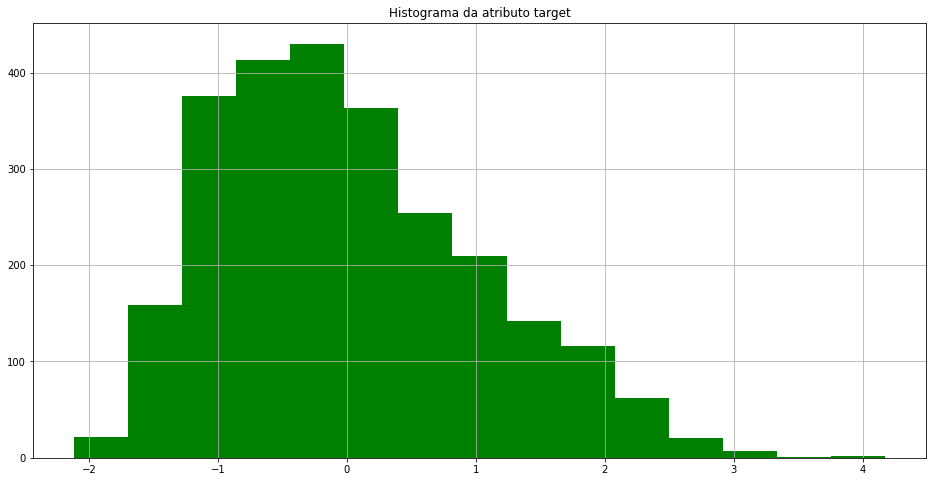

In [69]:
# Plota o histograma do atributo target
fig, ax = plt.subplots(figsize=(16,8))
ax.hist(y_teste, color='green', bins=15)
plt.title('Histograma da atributo target')
plt.grid(True)
plt.show()

In [70]:
# Reverte a alteração da escala feita anteriormente
x_teste_scale = scale_x.inverse_transform(x_teste)
x_teste_scale.shape

(2578, 10)

In [71]:
# Reverte a alteração da escala feita anteriormente
y_teste_scale = scale_y.inverse_transform(y_teste.ravel())
y_teste_scale.shape

(2578,)

In [72]:
# Reverte a alteração da escala feita anteriormente
y_previsto_scale = scale_y.inverse_transform(y_previsto.ravel())
y_previsto_scale.shape

(2578,)

In [73]:
# Calcula os residuos do modelo
residuos = y_teste_scale.ravel() - y_previsto_scale.ravel()
residuos.shape

(2578,)

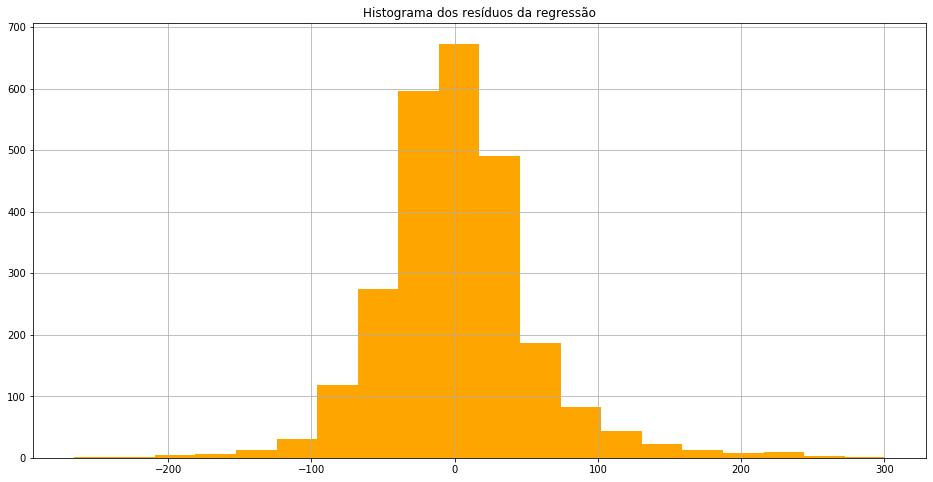

In [74]:
# Plota os residuos do modelo
# O ideal é que tenhamos uma distribuição normal nos resíduos.
fig, ax = plt.subplots(figsize=(16,8))
ax.hist(residuos,color='orange', bins=20)
plt.title('Histograma dos resíduos da regressão')
plt.grid(True)
plt.show()

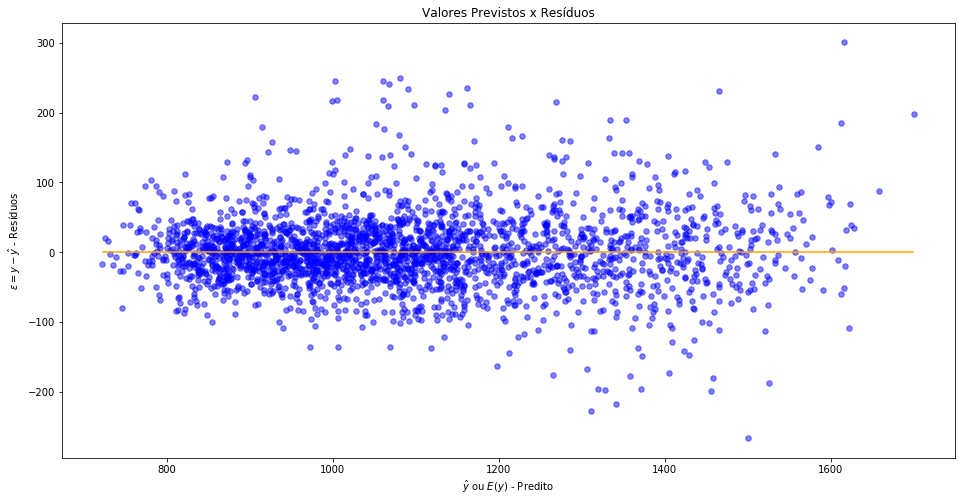

In [75]:
# Plota os Valores Previstos e os Resíduos
# Para ser considerado um "bom modelo" os resíduos devem estar distribuídos aleatoriamente.
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y=residuos, x=y_previsto_scale, color='blue', s=30, alpha=.5)
plt.hlines(y=0, xmin=min(y_previsto_scale), xmax=max(y_previsto_scale), color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.title('Valores Previstos x Resíduos')
plt.show()

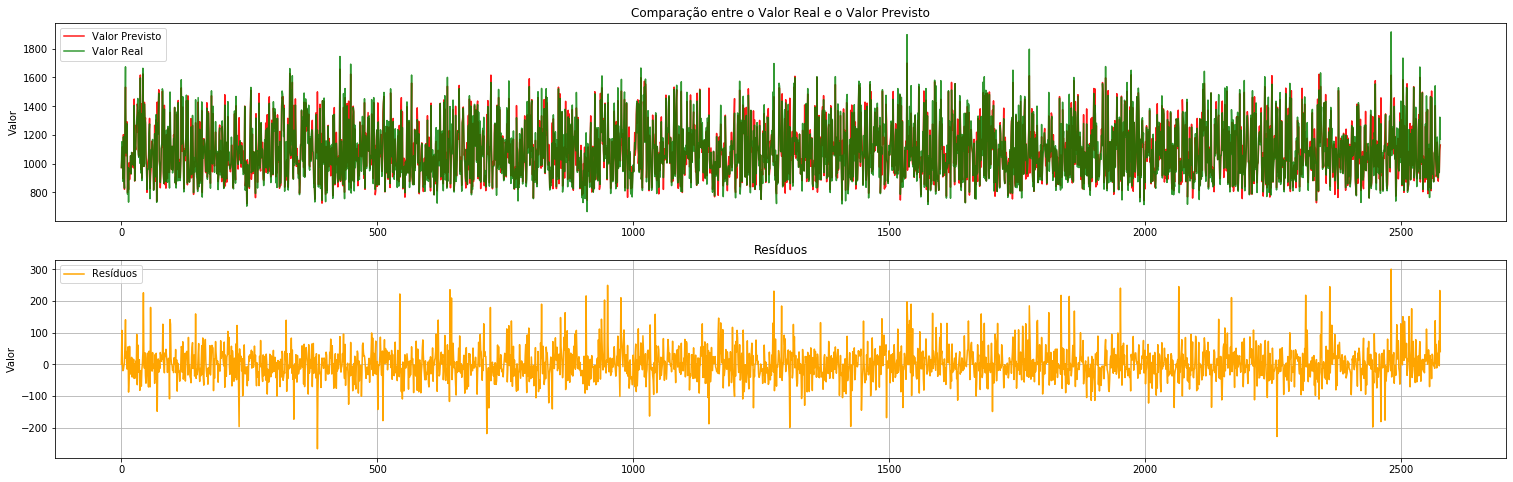

In [76]:
#Plota um gráfico de Comparação entre o Valor Real e o valor Previsto

fig, axs = plt.subplots(2, 1, figsize=(26,8))

# Valores
axs[0].plot(y_previsto_scale, alpha=0.9, label ='Valor Previsto', color='red')
axs[0].plot(y_teste_scale, alpha=0.8, label ='Valor Real', color='green')
axs[0].set_title('Comparação entre o Valor Real e o Valor Previsto')
axs[0].set_ylabel('Valor')
axs[0].legend(loc='upper left')

# Residuo
axs[1].plot(residuos,  label='Resíduos', color='orange')
axs[1].set_title('Resíduos')
axs[1].set_ylabel('Valor')
axs[1].legend(loc='upper left')

#fig.tight_layout()
plt.grid(True)
plt.show()

In [77]:
# Cria um dataframe com os atributos previsores o resultado da previsão
df_previsores = pd.DataFrame(x_teste_scale,  columns=atributos_previsores)
df_previsores.head()

,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,5.0,764.0,196.0,910.0,107.0,1029.0,992.0,9.5,51.0,0.6045
1,9.2,945.0,161.0,969.0,118.0,1425.0,911.0,22.7,22.9,0.6224
2,12.1,1052.0,148.0,671.0,137.0,1780.0,824.0,37.5,24.4,1.5515
3,5.4,784.0,46.0,1181.0,64.0,1407.0,610.0,21.4,36.9,0.9271
4,6.8,850.0,242.0,653.0,109.0,1169.0,1383.0,7.6,72.7,0.7598


In [78]:
# Reverte a alteração da escala feita anteriormente
y_teste_scale = scale_y.inverse_transform(y_teste.ravel())
y_teste_scale.shape

(2578,)

In [79]:
# Dataframe com o valor Previsto
df_prev = pd.DataFrame(y_previsto_scale, columns=['VALOR_PREVISTO'])

# Dataframe com o valor Real
df_real = pd.DataFrame(y_teste_scale, columns=['VALOR_REAL'])

# Juntando os dois dataframes
df_target = pd.merge(df_real, df_prev, right_index=True, left_index=True)
df_target['RESIDUO_MODELO'] = df_target.VALOR_REAL - df_target.VALOR_PREVISTO
df_target['%'] = np.abs(df_target.RESIDUO_MODELO /  df_target.VALOR_REAL ) * 100


In [80]:
# Compara os resultadados da previsao com o valores reais.
df_target.head()

,VALOR_REAL,VALOR_PREVISTO,RESIDUO_MODELO,%
0,974.0,972.999461,1.000539,0.102725
1,1153.0,1045.398229,107.601771,9.332330
2,1117.0,1118.722439,-1.722439,0.154202
3,878.0,897.766473,-19.766473,2.251307
4,1187.0,1202.724789,-15.724789,1.324751


In [81]:
# Agora juntando os dataframes de previsores e target
df_merge = pd.merge(df_previsores, df_target, right_index=True, left_index=True)

In [82]:
# Exibe a primeira linhas do dataframe com os previsores
df_merge.head()

,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,VALOR_REAL,VALOR_PREVISTO,RESIDUO_MODELO,%
0,5.0,764.0,196.0,910.0,107.0,1029.0,992.0,9.5,51.0,0.6045,974.0,972.999461,1.000539,0.102725
1,9.2,945.0,161.0,969.0,118.0,1425.0,911.0,22.7,22.9,0.6224,1153.0,1045.398229,107.601771,9.332330
2,12.1,1052.0,148.0,671.0,137.0,1780.0,824.0,37.5,24.4,1.5515,1117.0,1118.722439,-1.722439,0.154202
3,5.4,784.0,46.0,1181.0,64.0,1407.0,610.0,21.4,36.9,0.9271,878.0,897.766473,-19.766473,2.251307
4,6.8,850.0,242.0,653.0,109.0,1169.0,1383.0,7.6,72.7,0.7598,1187.0,1202.724789,-15.724789,1.324751


In [83]:
# Exibindo os registros onde houve um erro maior na previsão.
df_merge.sort_values(by='%', ascending=False).head()

,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,VALOR_REAL,VALOR_PREVISTO,RESIDUO_MODELO,%
383,20.8,1318.0,243.000000,714.0,108.0,2108.0,2202.0,22.6,45.9,1.2418,1234.0,1500.027656,-266.027656,21.558157
2258,16.7,1200.0,185.000000,686.0,159.0,1753.0,1505.0,27.8,26.6,0.9748,1084.0,1311.180604,-227.180604,20.957620
544,4.6,742.0,48.000000,1144.0,48.0,1507.0,610.0,21.4,40.3,1.0126,1128.0,905.689206,222.310794,19.708404
2066,10.1,982.0,95.000000,880.0,107.0,1617.0,746.0,30.4,26.5,1.1347,1248.0,1002.371552,245.628448,19.681767
714,20.3,1304.0,160.692308,939.0,119.0,1720.0,1290.0,25.0,24.4,0.7616,1123.0,1341.078202,-218.078202,19.419252


# Conclusão:

- Podemos observar nos resultados acima que nosso modelo obteve resultado razoável. Os resultados nos mostram que ainda há bastante espaço para melhorias, seja no tratamento e preparação dos dados e/ou na escolha dos algoritmos. Este estudo está longe de ser uma palavra final sobre o melhor algoritmo para esse conjunto de dados, mas é suficiente para nos dá uma direção.